## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [2]:
dbutils.library.installPyPI("matplotlib")
dbutils.library.restartPython()

PyPI package matplotlib has been installed already. The previous installed package is PyPI:(matplotlib)-(empty)-(empty)-(empty). To resolve this issue detach and retach the notebook to create a new environment or rename the package.

In [3]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, OneHotEncoderEstimator, VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression

In [4]:
# File location and type
file_location = "/FileStore/tables/baby_names-b9fc6.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
babynames = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

# Take a look at the data
display(babynames)

state,sex,year,name,count
AK,F,1910,Mary,14
AK,F,1910,Annie,12
AK,F,1910,Anna,10
AK,F,1910,Margaret,8
AK,F,1910,Helen,7
AK,F,1910,Elsie,6
AK,F,1910,Lucy,6
AK,F,1910,Dorothy,5
AK,F,1911,Mary,12
AK,F,1911,Margaret,7


In [5]:
babynames.printSchema()

root
-- state: string (nullable = true)
-- sex: string (nullable = true)
-- year: integer (nullable = true)
-- name: string (nullable = true)
-- count: integer (nullable = true)

As we can see, `yaer` and `count` are numeric and does not need any transformation. But we need to encode `state`, `sex` and `name` so that they could be used in the model.

In [7]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_i").fit(babynames) for column in list(set(babynames.columns)-set(['year','count'])) ]

# Convert the strings into numeric vectors
encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=[
        "{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers]
)

# Combine into a single feature column
assembler = VectorAssembler(
    inputCols=encoder.getOutputCols(),
    outputCol="features"
)

# Sequence stages as pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler])

# Store featured engineered data in a dataframe
babynames_ftr = pipeline.fit(babynames).transform(babynames)
babynames_ftr.show()

+-----+---+----+---------+-----+------+-----+-------+-------------------+-------------+---------------+--------------------+
state|sex|year| name|count|name_i|sex_i|state_i| name_i_encoded|sex_i_encoded|state_i_encoded| features|
+-----+---+----+---------+-----+------+-----+-------+-------------------+-------------+---------------+--------------------+
 AK| F|1910| Mary| 14| 8.0| 0.0| 49.0| (31313,[8],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[8,31313,3...|
 AK| F|1910| Annie| 12| 232.0| 0.0| 49.0|(31313,[232],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[232,31313...|
 AK| F|1910| Anna| 10| 32.0| 0.0| 49.0| (31313,[32],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[32,31313,...|
 AK| F|1910| Margaret| 8| 30.0| 0.0| 49.0| (31313,[30],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[30,31313,...|
 AK| F|1910| Helen| 7| 84.0| 0.0| 49.0| (31313,[84],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[84,31313,...|
 AK| F|1910| Elsie| 6| 449.0| 0.0| 49.0|(31313,[449],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[449,31313...|
 AK| F|1910| Lucy| 6| 207.0| 0.0| 49.0|(31313,[207],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[207,31313...|
 AK| F|1910| Dorothy| 5| 124.0| 0.0| 49.0|(31313,[124],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[124,31313...|
 AK| F|1911| Mary| 12| 8.0| 0.0| 49.0| (31313,[8],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[8,31313,3...|
 AK| F|1911| Margaret| 7| 30.0| 0.0| 49.0| (31313,[30],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[30,31313,...|
 AK| F|1911| Ruth| 7| 74.0| 0.0| 49.0| (31313,[74],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[74,31313,...|
 AK| F|1911| Annie| 6| 232.0| 0.0| 49.0|(31313,[232],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[232,31313...|
 AK| F|1911|Elizabeth| 6| 22.0| 0.0| 49.0| (31313,[22],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[22,31313,...|
 AK| F|1911| Helen| 6| 84.0| 0.0| 49.0| (31313,[84],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[84,31313,...|
 AK| F|1912| Mary| 9| 8.0| 0.0| 49.0| (31313,[8],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[8,31313,3...|
 AK| F|1912| Elsie| 8| 449.0| 0.0| 49.0|(31313,[449],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[449,31313...|
 AK| F|1912| Agnes| 7| 602.0| 0.0| 49.0|(31313,[602],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[602,31313...|
 AK| F|1912| Anna| 7| 32.0| 0.0| 49.0| (31313,[32],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[32,31313,...|
 AK| F|1912| Helen| 7| 84.0| 0.0| 49.0| (31313,[84],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[84,31313,...|
 AK| F|1912| Louise| 7| 339.0| 0.0| 49.0|(31313,[339],[1.0])|(1,[0],[1.0])|(50,[49],[1.0])|(31364,[339,31313...|
+-----+---+----+---------+-----+------+-----+-------+-------------------+-------------+---------------+--------------------+
only showing top 20 rows

In [8]:
# Keep required columns to paperE data for model
babynames_mdl = babynames_ftr.select(col("sex_i").alias("label"), col("features"))
babynames_mdl.show()

+-----+--------------------+
label| features|
+-----+--------------------+
 0.0|(31364,[8,31313,3...|
 0.0|(31364,[232,31313...|
 0.0|(31364,[32,31313,...|
 0.0|(31364,[30,31313,...|
 0.0|(31364,[84,31313,...|
 0.0|(31364,[449,31313...|
 0.0|(31364,[207,31313...|
 0.0|(31364,[124,31313...|
 0.0|(31364,[8,31313,3...|
 0.0|(31364,[30,31313,...|
 0.0|(31364,[74,31313,...|
 0.0|(31364,[232,31313...|
 0.0|(31364,[22,31313,...|
 0.0|(31364,[84,31313,...|
 0.0|(31364,[8,31313,3...|
 0.0|(31364,[449,31313...|
 0.0|(31364,[602,31313...|
 0.0|(31364,[32,31313,...|
 0.0|(31364,[84,31313,...|
 0.0|(31364,[339,31313...|
+-----+--------------------+
only showing top 20 rows

In [9]:
# Split data into test and train
train, test = babynames_mdl.randomSplit([0.7, 0.3], seed = 123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4151734
Test Dataset Count: 1781827

In [10]:
lr = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrmodel=lr.fit(train)

#predict_train=lrmodel.transform(train)
#predict_test=lrmodel.transform(test)
#predict_test.show(10)

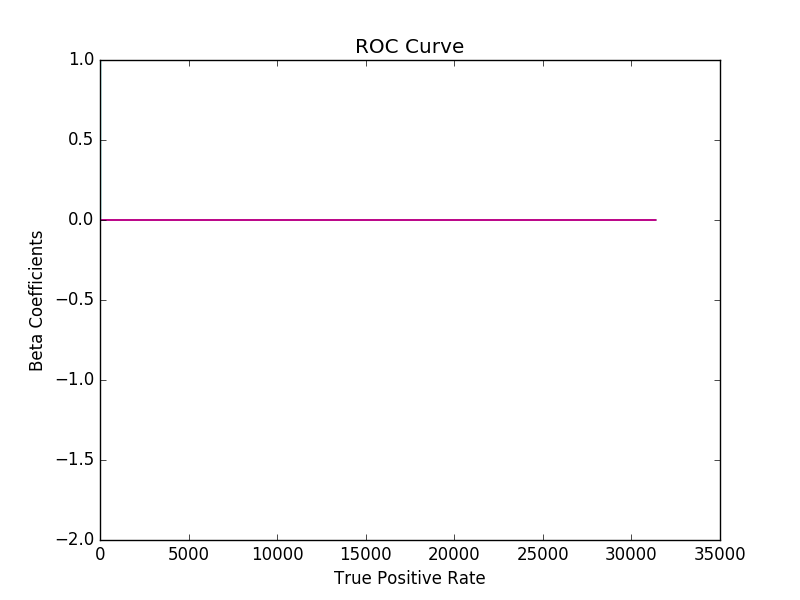

In [11]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrmodel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
display(plt.show())

In [12]:
trainingSummary = lrmodel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Training set areaUnderROC: 1.0